# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.0.1
Is using GPU? False


# Task 2: Preprocess Data

In [2]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)#getting indices of a particuar class
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)#concatenating these indices
    
    x = x[indices]#only taking the three selected classes
    y = y[indices]
    
    count = x.shape[0]#taking the count of total number of examples
    indices = np.random.choice(range(count), count, replace=False)#first argument is alist of examples second is how many random values we want to return and third is whether we want the item to be randomly selected to the same position or not
    
    x = x[indices]#arragement after random shuffling
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)#one hot encoding the three classes
    
    return x, y

In [6]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
#the original cifar dataset contained 60000 examples in the training set and 10000 examples in test set
x_train,y_train=get_three_classes(x_train,y_train)
x_test,y_test=get_three_classes(x_test,y_test)
print(x_train.shape,y_train.shape)#the(X) images are 32*32 and 3 channels
print(x_test.shape,y_test.shape)#y.shape's 3 shows we have three classes

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Task 3: Visualize Examples

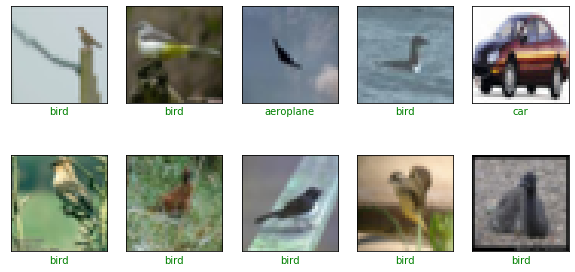

In [7]:
class_names = ['aeroplane', 'car', 'bird']
def show_random_examples(x,y,p):
    #this visualises examples by taking x,y and p is predictions if any so can be used for before model prediction and after also
    indices=np.random.choice(range(x.shape[0]),10,replace=False)
    x=x[indices]
    y=y[indices]
    p=p[indices]
    
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,1+i)#subplot with rows 2 and 5 columns and third for staring index from 1
        plt.imshow(x[i])#showing image
        plt.xticks([])#for not showing ticks
        plt.yticks([])
        col='green' if np.argmax(y[i])== np.argmax(p[i]) else 'red'
        #col is set to green if the index with the largest value for y[i] matches for p[i]i.e correct predictions otherwise incorrect predictions
        plt.xlabel(class_names[np.argmax(p[i])],color=col)
    plt.show()
show_random_examples(x_train,y_train,y_train)#initially we dont have predictions so sending y_train as predictions
    

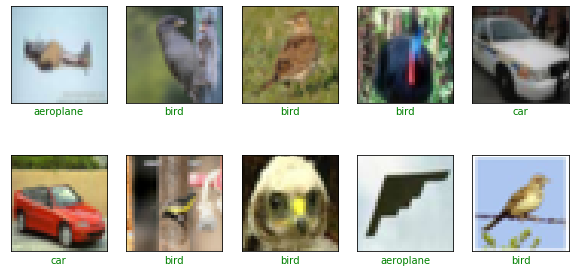

In [8]:
show_random_examples(x_test,y_test,y_test)

# Task 4: Create Model

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
def create_model():
    def add_conv_block(model,num_filters):
        model.add(Conv2D(num_filters,3,activation='relu',padding='same'))
        model.add(BatchNormalization())#done to ensure not a lot of covariance shift at the output of the preeceding layer
        model.add(Conv2D(num_filters,3,activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    
    model=tf.keras.models.Sequential()
    model.add(Input(shape=(32,32,3)))
    model=add_conv_block(model,32)   
    model=add_conv_block(model,64)
    model=add_conv_block(model,128)
    
    model.add(Flatten())
    model.add(Dense(3,activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',metrics=['accuracy']
    )
    return model

model=create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 15, 15, 64)       

# Task 5: Train the Model

In [15]:
h=model.fit(
        x_train/255.,y_train,
        validation_data=(x_test/255.,y_test),
        epochs=10,batch_size=128,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),
            tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',save_best_only=True,save_weights_only=False,monitor='val_accuracy')
        ]
        
)

Train on 15000 samples, validate on 3000 samples
Epoch 1/10
15000/15000 [==============================] - 327s 22ms/sample - loss: 0.8805 - accuracy: 0.6768 - val_loss: 2.9473 - val_accuracy: 0.3333
Epoch 2/10
15000/15000 [==============================] - 164s 11ms/sample - loss: 0.5683 - accuracy: 0.7681 - val_loss: 2.2211 - val_accuracy: 0.5340
Epoch 3/10
15000/15000 [==============================] - 223s 15ms/sample - loss: 0.4950 - accuracy: 0.7984 - val_loss: 1.6688 - val_accuracy: 0.5353
Epoch 4/10
15000/15000 [==============================] - 220s 15ms/sample - loss: 0.4528 - accuracy: 0.8220 - val_loss: 0.7053 - val_accuracy: 0.7110
Epoch 5/10
15000/15000 [==============================] - 218s 15ms/sample - loss: 0.4050 - accuracy: 0.8399 - val_loss: 0.5283 - val_accuracy: 0.8020
Epoch 6/10
15000/15000 [==============================] - 225s 15ms/sample - loss: 0.3699 - accuracy: 0.8543 - val_loss: 0.3855 - val_accuracy: 0.8477
Epoch 7/10
15000/15000 [=====================

# Task 6: Final Predictions

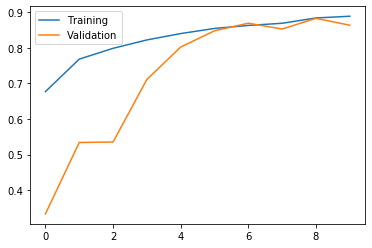

In [16]:
accs=h.history['accuracy']
val_accs=h.history['val_accuracy']

plt.plot(range(len(accs)),accs,label='Training')
plt.plot(range(len(accs)),val_accs,label='Validation')
plt.legend()
plt.show()

In [18]:
model=tf.keras.models.load_model('models/model_0.883.h5')#loading model with highest accuracy

In [19]:
preds=model.predict(x_test/255.)#dividing by 255 for normalising i.e value between 0 and 1

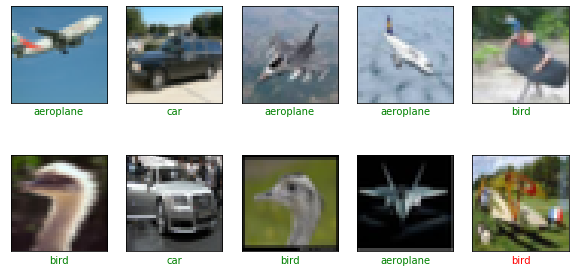

In [24]:
show_random_examples(x_test,y_test,preds)